# Example Template for HW3

This notebook contains the same template code as "logisticClassify2.py", but reorganized to make it simpler to edit and solve in iPython.  Feel free to use this for your homework, or do it another way, as you prefer.



In [2]:
from __future__ import division

import numpy as np
np.random.seed(0)

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

## Problem 1

In [3]:
iris = np.genfromtxt("/Users/ding/Desktop/CS178/178-hw3-code/data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = ml.transforms.rescale(X)  # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2

### P1.1

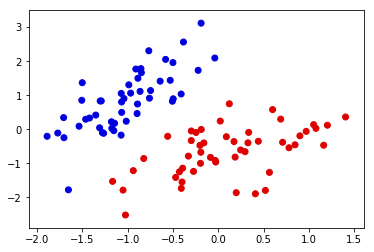

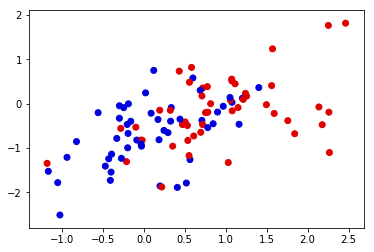

Class 0 and Class 1 are separable.


In [6]:
# ...
ml.plotClassify2D(None, XA, YA, label='Dataset A')
plt.show()
ml.plotClassify2D(None, XB, YB, label='Dataset B')
plt.show()
print("Class 0 and Class 1 are separable.")

### P1.2

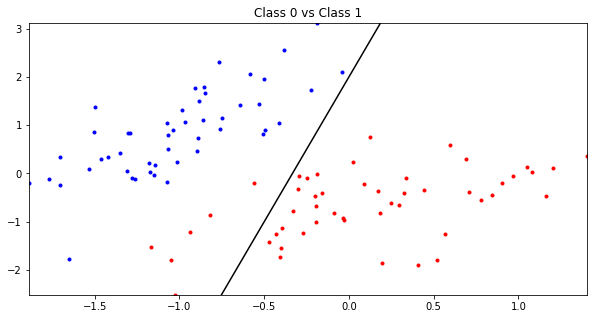

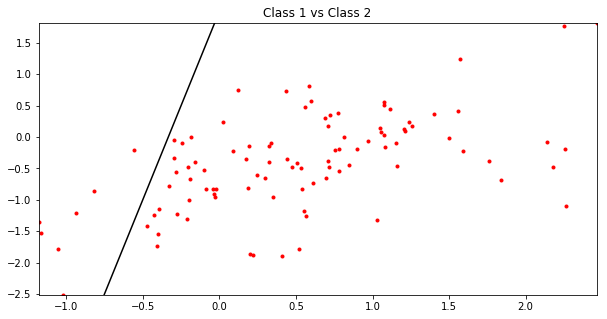

In [45]:
def myPlotBoundary(self, X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]])  # at X1 = points in x1b
    x2b = (-self.theta[0]-self.theta[1]*x1b)/self.theta[2]     # TODO find x2 values as a function of x1's values
    ## Now plot the data and the resulting boundary:
    A = Y==self.classes[0]; # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();


# Create a shell classifier
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [2., 6., -1.] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = None                   # these functions will be implemented later
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2., 6., -1.]);# TODO: insert hard-coded values
plt.title("Class 0 vs Class 1")
learnerA.plotBoundary(XA,YA)
plt.show()


learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = np.array([2., 6., -1.]);# TODO: insert hard-coded values
plt.title("Class 1 vs Class 2")
learnerA.plotBoundary(XB,YB)
plt.show()

In [46]:
# ...

In [47]:
# Should go in your logistic2 class:
def myPredict(self,X):
    """ Return the predictied class of each data point in X"""
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2]  for each i
    ## TODO: if r[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    r = []
    Yhat = []
    for i,_ in enumerate(X):
        r.append(self.theta[0] + self.theta[1]*X[i,0] + self.theta[2]*X[i,1])
        if r[i] >0:
            Yhat.append(self.classes[1])
        else:
            Yhat.append(self.classes[0])
    Yhat = np.array(Yhat)
    return Yhat


# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [2, 6, -1] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = [2., 6., -1.]  # TODO: insert hard-coded values

learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = [2., 6., -1.]  # TODO: insert hard-coded values
# print "Error: ", learnerA.err(XA,YA)
error_A = learnerA.err(XA,YA)
error_B = learnerB.err(XB,YB)
print("Error for dataset A:", error_A)
print("Error for dataset B:", error_B)
# ...

('Error for dataset A:', 0.06060606060606061)
('Error for dataset B:', 0.45454545454545453)


If predict is implemented, then the inherited 2D visualization function should work; you can verify your decision boundary from P1.2:

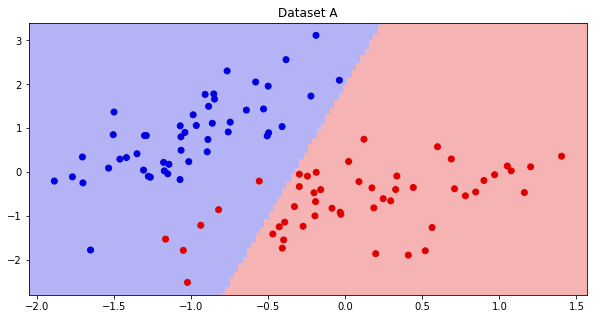

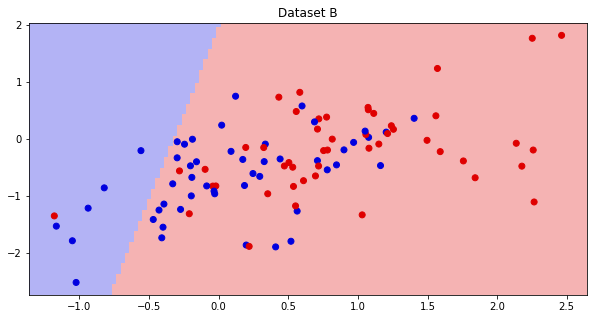

In [48]:
plt.title("Dataset A")
ml.plotClassify2D(learnerA,XA,YA)
plt.show()

plt.title("Dataset B")
ml.plotClassify2D(learnerB,XB,YB)
plt.show()

## ...


Here is an example of latex equations that may be useful for expressing the gradient:

### 1.5 Gradient of NLL

Our negative log-likelihood loss is:
$$J_j(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$

Thus, its gradient is:
$$\nabla J_j(\theta) = - \begin{cases} (1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1  \\ -\sigma(x^{(i)} \cdot \theta) & \mbox{if}\  y^{(i)}=0\end{cases}$$

## 1.6

Now define the train function and complete its missing code.

In [49]:
def myTrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    from IPython import display
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri    = ri = self.theta[0] + self.theta[1]*X[i,0] + self.theta[2]*X[i,1]      # TODO: compute linear response r(x)
            si = 1.0/(1.0 + np.exp(-ri))
            gradi = (si - YY[i])*XX[i,:]     # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = - sum_i [ (log si) if yi==1 else (log(1-si)) ]
        Jsur = np.sum([np.log(si) if YY[i]==1 else np.log(1-si)])
        Jnll.append( Jsur ) # TODO evaluate the current NLL loss
        display.clear_output(wait=True);
        plt.subplot(1,2,1); plt.cla(); plt.plot(Jnll,'b-',J01,'r-'); # plot losses
        if N==2: plt.subplot(1,2,2); plt.cla(); self.plotBoundary(X,Y); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot        

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        # or if Jnll not changing between epochs ( < stopTol )
        if(epoch >= stopEpochs):
            done = True
        if(epoch >1 and abs(Jnll[-2]-Jnll[-1] < stopTol)):
            done = True


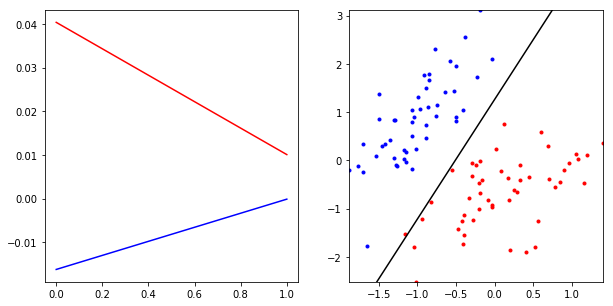

In [50]:
# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [2., 6., -1.] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain

plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
    
learnerA = logisticClassify2()
learnerA.theta = np.array([2., 6., -1.])
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5)

('Training error rate: ', 0.010101010101010102)


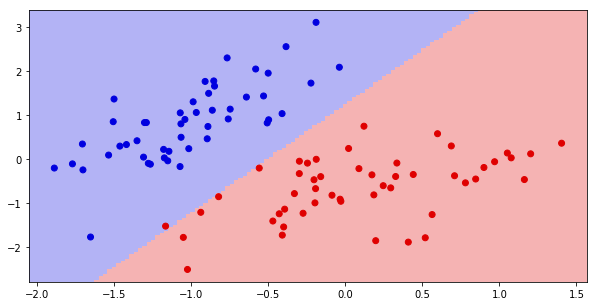

In [51]:
ml.plotClassify2D(learnerA,XA,YA)
print("Training error rate: ",learnerA.err(XA,YA))
plt.show()

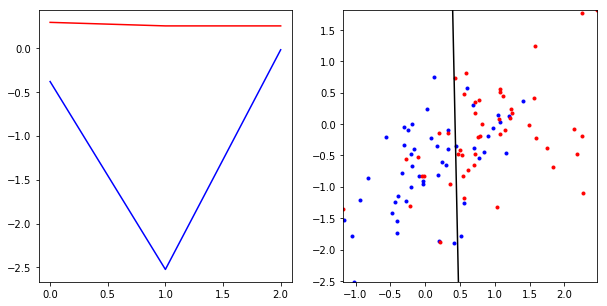

In [54]:
plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
    
learnerB = logisticClassify2()
learnerB.theta = np.array([2., 6., -1.])
learnerB.train(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5)

('Training error rate: ', 0.25252525252525254)


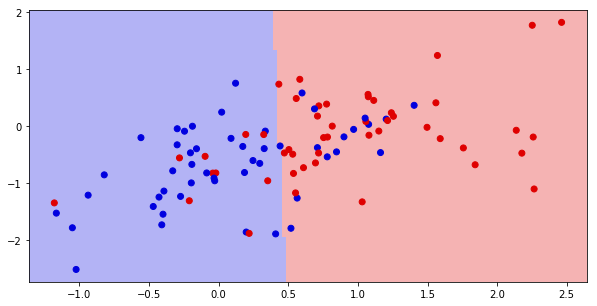

In [55]:
ml.plotClassify2D(learnerB,XB,YB)
print("Training error rate: ",learnerB.err(XB,YB))
plt.show()

# Problem 2: Shattering and VC Dimension
 1. This learner can shatter either (a) or (b) because this learner is a standard peceptron on on feature.
 (c) and (d) don't match the requriments.
 
 2. Thre are 3 paramters in the learner function. This learner can shatter (a), (b) and (c) because it has a VC dimension of 3. Of course, (d) can not be shatter.
 
 3. (a), (b) and (c) can be shatterd in this learner. However, for (d), we can't do that. Function T looks like a circle in this learner, and there are some point in (d) that  can not be contained in the circle. 

# Problem 3: Statement of Collaboration
Before starting the homework, I sutdy the discussion and lecture ppt.
also, I reviwed the piaaza question.

# Problem 4: Halloween
In Halloween, I hang out with my friends. We had a great hot pot dinner in shopping mall.
Then, we went back home and played the video games.